<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
C:\Users\1433135\AppData\Local\Temp\1\ipykernel_4692\4053072073.py:5: SyntaxWarning: invalid escape sequence '\d'
  df = pd.read_csv(".\data.csv")


   Duration          Date  Pulse  Maxpulse  Calories
0        60  '2020/12/01'    110       130     409.1
1        60  '2020/12/02'    117       145     479.0
2        60  '2020/12/03'    103       135     340.0
3        45  '2020/12/04'    109       175     282.4
4        45  '2020/12/05'    117       148     406.0
Data with valid dates:
     Duration       Date  Pulse  Maxpulse  Calories
0         60 2020-12-01    110       130     409.1
1         60 2020-12-02    117       145     479.0
2         60 2020-12-03    103       135     340.0
3         45 2020-12-04    109       175     282.4
4         45 2020-12-05    117       148     406.0
5         60 2020-12-06    102       127     300.0
6         60 2020-12-07    110       136     374.0
7        450 2020-12-08    104       134     253.3
8         30 2020-12-09    109       133     195.1
9         60 2020-12-10     98       124     269.0
10        60 2020-12-11    103       147     329.3
11        60 2020-12-12    100       120     2

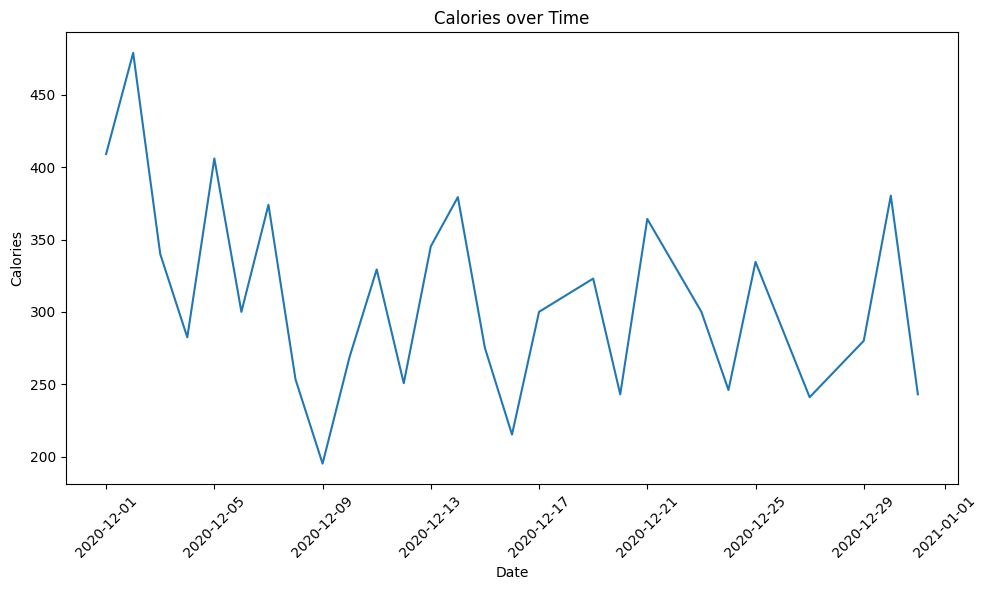

In [2]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv(".\data.csv")
print(df.head())


# Remove rows with ANY null values
df = df.dropna()

# Remove rows where specific column has null values
#df = df.dropna(subset=['date_column'])

# Remove rows where ALL values are null
#df = df.dropna(how='all')

# Remove columns with null values
#df = df.dropna(axis=1)

# Fill null values instead of removing
#df = df.fillna(0)  # Replace with 0
#df = df.fillna(method='ffill')  # Forward fill
#df = df.fillna(df.mean())  # Replace with column mean
#print(df)


# Find rows where date column doesn't match date format
#df['is_valid_date'] = pd.to_datetime(df['Date'], errors='coerce').notna()

##invalid_dates = df[~df['is_valid_date']]
#print("Invalid dates:\n", invalid_dates)

# Convert Date column to datetime format (replaces the column)
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Remove rows with invalid dates (NaT values)
df = df.dropna(subset=['Date'])

print("Data with valid dates:\n", df)

# Convert Date column to datetime format (replaces the column)
#df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Remove rows with invalid dates (NaT values)
#df = df.dropna(subset=['Date'])

#print("Data with valid dates:\n", df)

# Optional: Change date format for display
#df['Date'] = df['Date'].dt.strftime('%Y-%m-%d')

# Optional: Replace entire column with a specific date
# df['Date'] = pd.to_datetime('2026-01-08')

# Optional: Replace with a date range
# df['Date'] = pd.date_range('2026-01-01', periods=len(df), freq='D')

df = df.drop_duplicates()
# Remove duplicates based on all columns EXCEPT one
# Example: ignore 'Date' column when checking for duplicates
columns_to_check = [col for col in df.columns if col != '']
df = df.drop_duplicates(subset=columns_to_check)


print("Cleaned Data:\n", df)

# Create a simple plot
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Calories'])  # Replace 'column_name' with your column
plt.xlabel('Date')
plt.ylabel('Calories')
plt.title('Calories over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()